In [12]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Traindata & TestData Variables

In [ ]:
!rm -rf /content/GTSRB

In [101]:
import torchvision
test_path = '/content/Testing'
train_path = '/content/Training'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAutocontrast(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])




train_dataset = datasets.GTSRB(
        root='/content', split='train',
        download=True, transform=preprocess,
    )

test_dataset = datasets.GTSRB(
        root='/content', split='test',
        download=True, transform=preprocess,
    )


train_dataLoader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True,  num_workers=0)
print('Train',len(train_dataset))

print('TEST',len(test_dataset))
test_dataLoader = torch.utils.data.DataLoader(test_dataset, batch_size=512, shuffle=True,  num_workers=0)


Train 26640
TEST 12630


Hyper Parameters

In [14]:
num_classes = 43
num_epochs = 30
batch_size = 512
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
if torch.cuda.is_available():
    model.cuda()

cuda


In [15]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [16]:
import time
start_time = time.time()
total_step = len(train_dataLoader)
accuracy_list = []

steps_list = []
train_loss = []
train_accuracy = []
train_loss = []

for epoch in range(num_epochs):
  for i, data in enumerate(train_dataLoader):
    images, labels = data[0].to(device), data[1].to(device)

    #Forward Pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backpropogation and Optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Train Accuracy
    total = labels.size(0)
    _, predicted = torch.max(outputs.data,1)

    correct = (predicted == labels).sum().item()
    
    steps = i + 1
    accuracy = (correct / total) * 100
    accuracy_list.append(accuracy)
    steps_list.append(steps)
    train_loss.append(loss.item())
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, steps, total_step, loss.item(),
          accuracy))
    
    

print("######## Training Finished in {} seconds ###########".format(time.time()-start_time))
print("Accuracy List: ",accuracy_list, "Steps List: ",steps_list)

Epoch [1/30], Step [1/53], Loss: 6.9046, Accuracy: 0.00%
Epoch [1/30], Step [2/53], Loss: 21.3973, Accuracy: 5.47%
Epoch [1/30], Step [3/53], Loss: 6.4188, Accuracy: 4.30%
Epoch [1/30], Step [4/53], Loss: 6.4988, Accuracy: 4.30%
Epoch [1/30], Step [5/53], Loss: 5.7603, Accuracy: 3.71%
Epoch [1/30], Step [6/53], Loss: 4.2745, Accuracy: 4.30%
Epoch [1/30], Step [7/53], Loss: 4.7422, Accuracy: 4.69%
Epoch [1/30], Step [8/53], Loss: 4.1247, Accuracy: 4.88%
Epoch [1/30], Step [9/53], Loss: 4.2604, Accuracy: 3.52%
Epoch [1/30], Step [10/53], Loss: 4.0450, Accuracy: 2.54%
Epoch [1/30], Step [11/53], Loss: 4.0759, Accuracy: 3.52%
Epoch [1/30], Step [12/53], Loss: 3.9502, Accuracy: 3.32%
Epoch [1/30], Step [13/53], Loss: 3.9386, Accuracy: 3.71%
Epoch [1/30], Step [14/53], Loss: 3.9470, Accuracy: 2.93%
Epoch [1/30], Step [15/53], Loss: 3.8277, Accuracy: 4.69%
Epoch [1/30], Step [16/53], Loss: 3.9332, Accuracy: 3.52%
Epoch [1/30], Step [17/53], Loss: 3.7793, Accuracy: 5.86%
Epoch [1/30], Step [18

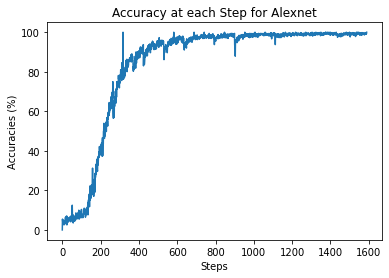

In [17]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Accuracy at each Step for Alexnet")
pyplot.xlabel("Steps")
pyplot.ylabel("Accuracies (%)")
pyplot.plot(accuracy_list)

pyplot.show()

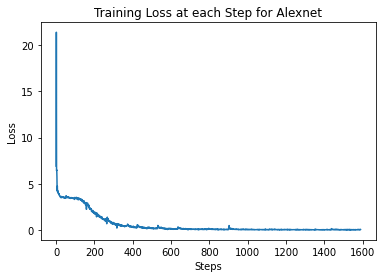

In [18]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Training Loss at each Step for Alexnet")
pyplot.xlabel("Steps")
pyplot.ylabel("Loss")
pyplot.plot(train_loss)

pyplot.show()

In [89]:
from torch.autograd import Variable
train_loss = []
train_accuracy = []
valid_loss = []
valid_accuracy = []
import torch.nn.functional as F
y_pred_list = []
y_true = []


def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0
    total = 0
    corr_classified = 0
    for data, target in data_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)
        loss += F.cross_entropy(output, target, size_average=False).item()
        pred = torch.max(output.data, 1)[1]
        # y_pred.extend(pred) # Save Prediction
        y_pred_tags = target.cpu().numpy()
        y_pred = y_pred_tags[0]
        y_pred = labels[y_pred]
        y_pred_list.append(y_pred)
        print(y_pred)
        if labels_list[i] == y_pred:
            corr_classified += 1
        print('Corr:',corr_classified)
        total += len(data)
        correct += (pred == target).sum()
    loss /= len(data_loader.dataset)
    valid_loss.append(loss)    
    valid_accuracy.append(100 * correct / total)
    print('\nAverage Validation loss: {:.5f}\tAccuracy: {} %'.format(loss, 100 * correct / total))
    print("Number of correctly classified images = %d" % corr_classified)
    print("Number of incorrectly classified images = %d" % (12630 - corr_classified))
    print("Final accuracy = %f" % (corr_classified / 12630))
    

In [ ]:
for epoch in range(1):
  evaluate(test_dataLoader)

In [99]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 25           |        cudaMalloc retries: 26        |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   13889 MB |   13889 MB |   22229 GB |   22216 GB |\n|       from large pool |   13887 MB |   13887 MB |   22228 GB |   22214 GB |\n|       from small pool |       2 MB |       5 MB |       1 GB |       1 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |   13889 MB |   13889 MB |   22229 GB |   22216 GB |\n|       from large pool |   13887 MB |   13887 MB |

In [82]:
num = range(43)
labels = []
for i in num:
    labels.append(str(i))
labels = sorted(labels)
for i in num:
    labels[i] = int(labels[i])
print("List of labels : ")
print("Actual labels \t--> Class in PyTorch")
for i in num:
    print("\t%d \t--> \t%d" % (labels[i], i))

List of labels : 
Actual labels 	--> Class in PyTorch
	0 	--> 	0
	1 	--> 	1
	10 	--> 	2
	11 	--> 	3
	12 	--> 	4
	13 	--> 	5
	14 	--> 	6
	15 	--> 	7
	16 	--> 	8
	17 	--> 	9
	18 	--> 	10
	19 	--> 	11
	2 	--> 	12
	20 	--> 	13
	21 	--> 	14
	22 	--> 	15
	23 	--> 	16
	24 	--> 	17
	25 	--> 	18
	26 	--> 	19
	27 	--> 	20
	28 	--> 	21
	29 	--> 	22
	3 	--> 	23
	30 	--> 	24
	31 	--> 	25
	32 	--> 	26
	33 	--> 	27
	34 	--> 	28
	35 	--> 	29
	36 	--> 	30
	37 	--> 	31
	38 	--> 	32
	39 	--> 	33
	4 	--> 	34
	40 	--> 	35
	41 	--> 	36
	42 	--> 	37
	5 	--> 	38
	6 	--> 	39
	7 	--> 	40
	8 	--> 	41
	9 	--> 	42


In [76]:
import pandas as pd
df = pd.read_csv("/content/gtsrb/GT-final_test.csv",sep=';')
numExamples = len(df)
print(numExamples)
print(df.head())
for col in df.columns:
    print(col)
labels_list = list(df.ClassId)
print(labels_list)

12630
    Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000.ppm     53      54       6       5      48      49       16
1  00001.ppm     42      45       5       5      36      40        1
2  00002.ppm     48      52       6       6      43      47       38
3  00003.ppm     27      29       5       5      22      24       33
4  00004.ppm     60      57       5       5      55      52       11
Filename
Width
Height
Roi.X1
Roi.Y1
Roi.X2
Roi.Y2
ClassId
[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38, 4, 33, 9, 3, 1, 11, 13, 10, 9, 11, 5, 17, 34, 23, 2, 17, 3, 12, 16, 8, 7, 30, 18, 12, 24, 25, 3, 10, 18, 8, 25, 13, 15, 9, 13, 35, 5, 26, 9, 16, 38, 10, 4, 9, 15, 9, 26, 2, 5, 28, 11, 25, 30, 34, 5, 12, 1, 10, 25, 25, 21, 33, 25, 7, 10, 35, 3, 7, 22, 13, 3, 1, 2, 14, 12, 32, 3, 38, 9, 33, 1, 10, 5, 11, 33, 4, 35, 25, 33, 4, 1, 14, 16, 10, 30, 3, 27, 29, 1, 17, 13, 7, 1, 8, 2, 10, 10, 30, 1, 6, 36, 3, 14, 13, 11, 10, 18, 40, 2, 38, 41, 4, 6, 1

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in test_dataLoader:
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=8).permute((1, 2, 0)))
    break

In [100]:
PATH = '/content/Alex_GTSRB'
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss,
            'accuracy': accuracy_list
            }, PATH)